In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
plt.style.use('seaborn')

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Load Datasets

In [4]:
df_people = pd.read_csv("./train.csv")

In [5]:
df_people.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


## Preprocess Data

In [6]:
# convert year birth into age
now = datetime.datetime.now()
current_year = now.year
df_people['age'] = current_year - df_people['age']

# change Y/N into 1/0
df_people['marital_status_maried(Y/N)'] = df_people['marital_status_maried(Y/N)'].map(dict(Y=1, N=0))

# change text into score
df_target = df_people['achievement_target_1']

df_target[df_target == 'Tidak diberikan target'] = 0
df_target[df_target == 'achiev_< 50%'] = 1; df_target[df_target == 'Pencapaian < 50%'] = 1
df_target[df_target == 'achiev_> 1.5'] = 1.5; df_target[df_target == 'Pencapaian > 1.5'] = 1.5
df_target[df_target == 'achiev_50%-100%'] = 2; df_target[df_target == 'Pencapaian 50%-100%'] = 2
df_target[df_target == 'achiev_100%-150%'] = 3; df_target[df_target == 'Pencapaian 100%-150%'] = 3

df_target = df_people['achievement_target_2']

df_target[df_target == 'Tidak diberikan target'] = 0
df_target[df_target == 'achiev_< 50%'] = 1; df_target[df_target == 'Pencapaian < 50%'] = 1
df_target[df_target == 'achiev_> 1.5'] = 1.5; df_target[df_target == 'Pencapaian > 1.5'] = 1.5
df_target[df_target == 'achiev_50%-100%'] = 2; df_target[df_target == 'Pencapaian 50%-100%'] = 2
df_target[df_target == 'achiev_100%-150%'] = 3; df_target[df_target == 'Pencapaian 100%-150%'] = 3

df_target = df_people['achievement_target_3']

df_target[df_target == 'not_reached'] = 0
df_target[df_target == 'not reached'] = 0
df_target[df_target == 'reached'] = 1

## Explore & Visualize Data

In [7]:
print('Total rows:', df_people.shape[0])
print('Total features:', df_people.shape[1])

Total rows: 22005
Total features: 30


In [8]:
df_people.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3'],
      dtype='object')

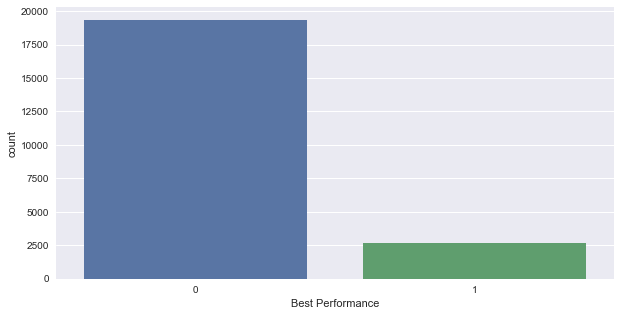

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Best Performance', data=df_people)
plt.show()

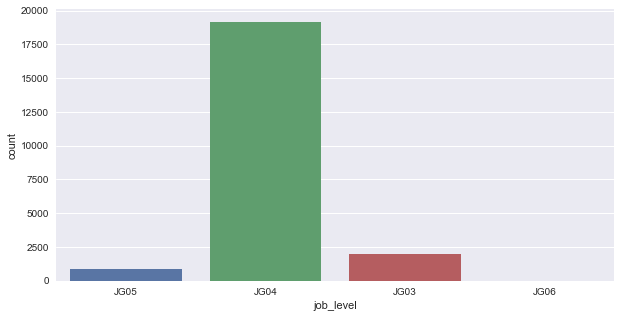

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='job_level', data=df_people)
plt.show()

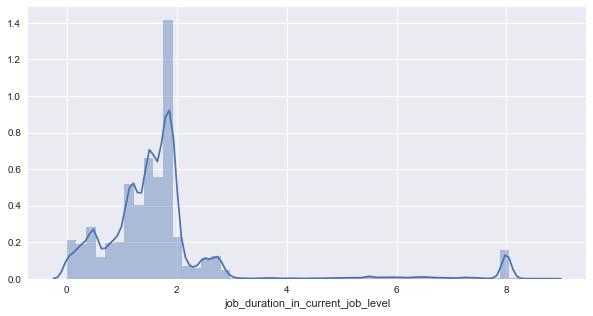

In [11]:
plt.figure(figsize=(10, 5))
sns.distplot(df_people['job_duration_in_current_job_level'])
plt.show()

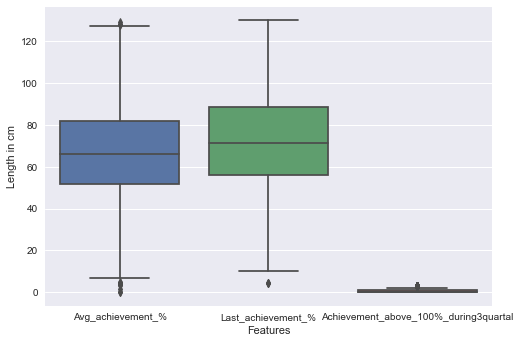

In [12]:
sns.boxplot(data=df_people[['Avg_achievement_%', 'Last_achievement_%', 'Achievement_above_100%_during3quartal']])
plt.xlabel('Features')
plt.ylabel('Length in cm')
plt.show()

In [13]:
df_people.isnull().any()

job_level                                False
job_duration_in_current_job_level        False
person_level                             False
job_duration_in_current_person_level     False
job_duration_in_current_branch           False
Employee_type                             True
Employee_status                          False
gender                                   False
age                                      False
marital_status_maried(Y/N)               False
number_of_dependences                    False
number_of_dependences (male)             False
number_of_dependences (female)           False
Education_level                           True
GPA                                       True
year_graduated                            True
job_duration_as_permanent_worker          True
job_duration_from_training               False
branch_rotation                          False
job_rotation                             False
assign_of_otherposition                  False
annual leave 

In [14]:
df_people.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
count,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,18502.000000,19950.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,15716.000000,15703.000000,15703.000000
mean,1.733252,1.555544,1.088203,32.601318,0.711611,0.746239,0.379232,0.366917,2.994603,4.872481,4.546876,2.889571,2.832265,0.818723,2.794138,0.898069,0.121245,66.344676,71.420847,0.682991
std,1.422136,0.954620,0.839882,4.274737,0.453023,0.840026,0.606961,0.597422,11.699025,4.500514,4.519389,2.193424,1.751125,2.250188,2.822423,2.848540,0.326419,23.253675,24.095520,1.107861
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.260000,0.000000
25%,1.170000,1.080000,0.500000,30.000000,0.000000,0.000000,0.000000,0.000000,2.810000,3.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,51.675000,55.935000,0.000000
50%,1.580000,1.500000,0.830000,32.000000,1.000000,1.000000,0.000000,0.000000,3.090000,4.000000,4.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,66.310833,71.410000,0.000000
75%,1.920000,1.830000,1.500000,34.000000,1.000000,1.000000,1.000000,1.000000,3.300000,6.000000,5.000000,3.000000,3.000000,0.000000,5.000000,1.000000,0.000000,81.930833,88.350000,1.000000
max,8.750000,8.000000,7.500000,57.000000,1.000000,7.000000,4.000000,4.000000,381.000000,34.000000,35.000000,22.000000,15.000000,54.000000,41.000000,132.000000,1.000000,129.010000,130.000000,3.000000


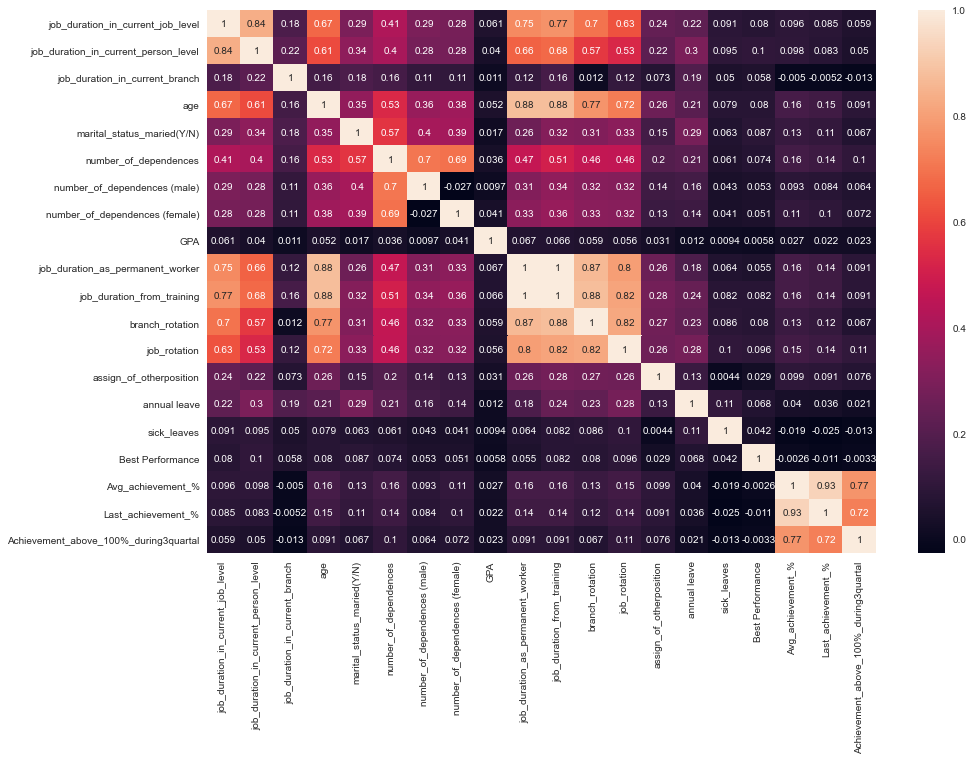

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df_people.corr(), annot=True)
plt.show()

---